In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path

In [2]:
### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
#batch_size = 200

num_classes = 3
num_classes0 = 2

#epochs = 1
#nb_epoch=epochs

n_mesh=50

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh

#input_shape = (img_rows, img_cols, 1)

In [3]:
# For output the galaxy classification results
f1=open('test27d.out','w')

# This is for simlation data sets
with open('2dfv.dat') as f:
  lines=f.readlines()

nmodel=3000

x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
y_train=np.zeros(nmodel,dtype=np.int)
y_test=np.zeros(nmodel,dtype=np.int)




#y_test=np.zeros(nmodel)
#print(y_train)

In [4]:
# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

ntest=ibin
print('ntest',ntest)

ntest 542


In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

In [6]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#y_vec=np.zeros(3)
#y_vec=np.zeros(num_classes)
y_vec=np.zeros(num_classes)
#print(y_vec)

y_pred=loaded_model.predict(x_test)
print(y_pred[:ntest])
print(len(y_pred[:ntest]))
f1.write( str(ntest) + "\n" )
print(range(ntest))
for i in range(ntest):
#  for j in range(num_classes0):
  for j in range(num_classes):
    y_vec[j]=y_pred[i,j]
#  print(y_vec)
#    print(j)
  y_type=np.argmax(y_vec)
#  y_type=y_type+1
  prob=y_vec[y_type]
  print('i=',i,'G-type=',y_type,'P',prob)
#  Original  type-1 is output
  f1.write( str(y_type) + ' ' + str(y_vec[0]) + ' '+
  str(y_vec[1]) + ' ' + str(y_vec[2]) + "\n" )
#  f1.write( str(y_type) +
#   "\n" )

f1.flush()
#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

Loaded model from disk
[[0.39027223 0.41223246 0.19749531]
 [0.38656047 0.4167979  0.19664167]
 [0.38355762 0.41218933 0.20425303]
 ...
 [0.33305806 0.3311786  0.3357633 ]
 [0.33328828 0.33084133 0.3358704 ]
 [0.33333856 0.33121198 0.3354495 ]]
542
range(0, 542)
i= 0 G-type= 1 P 0.4122324585914612
i= 1 G-type= 1 P 0.4167979061603546
i= 2 G-type= 1 P 0.4121893346309662
i= 3 G-type= 1 P 0.3785895109176636
i= 4 G-type= 1 P 0.3740440309047699
i= 5 G-type= 1 P 0.4192103445529938
i= 6 G-type= 1 P 0.3797276020050049
i= 7 G-type= 1 P 0.3748777508735657
i= 8 G-type= 1 P 0.4095849096775055
i= 9 G-type= 1 P 0.3775566518306732
i= 10 G-type= 1 P 0.41015222668647766
i= 11 G-type= 1 P 0.4095993936061859
i= 12 G-type= 1 P 0.3928515911102295
i= 13 G-type= 1 P 0.41112202405929565
i= 14 G-type= 1 P 0.3966572880744934
i= 15 G-type= 1 P 0.40076959133148193
i= 16 G-type= 1 P 0.4172181487083435
i= 17 G-type= 1 P 0.40613988041877747
i= 18 G-type= 1 P 0.37766480445861816
i= 19 G-type= 1 P 0.3732019364833832
i=

i= 352 G-type= 1 P 0.4090161621570587
i= 353 G-type= 1 P 0.3979869782924652
i= 354 G-type= 1 P 0.39682862162590027
i= 355 G-type= 1 P 0.37430253624916077
i= 356 G-type= 1 P 0.41300109028816223
i= 357 G-type= 1 P 0.3997870683670044
i= 358 G-type= 1 P 0.4110075533390045
i= 359 G-type= 1 P 0.4113684892654419
i= 360 G-type= 1 P 0.4122236967086792
i= 361 G-type= 1 P 0.4006340503692627
i= 362 G-type= 2 P 0.33584004640579224
i= 363 G-type= 2 P 0.33545324206352234
i= 364 G-type= 2 P 0.3354489505290985
i= 365 G-type= 2 P 0.33566826581954956
i= 366 G-type= 2 P 0.3358396887779236
i= 367 G-type= 2 P 0.3359066843986511
i= 368 G-type= 2 P 0.3354492783546448
i= 369 G-type= 2 P 0.3358694911003113
i= 370 G-type= 2 P 0.3354487717151642
i= 371 G-type= 2 P 0.3360920250415802
i= 372 G-type= 2 P 0.3358398675918579
i= 373 G-type= 2 P 0.33576300740242004
i= 374 G-type= 2 P 0.3354531228542328
i= 375 G-type= 2 P 0.33586955070495605
i= 376 G-type= 2 P 0.3354489207267761
i= 377 G-type= 2 P 0.33566898107528687
i= 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = np.zeros((num_classes, num_classes))


In [8]:
true_data = np.loadtxt('2dftl.dat')
predicted_data = np.loadtxt('test27d.out', skiprows=1)
predicted_class = predicted_data[:, 0]

for i in range(num_classes):
    N = np.count_nonzero(true_data == (i + 1))
    ind_arr = np.where(true_data == (i + 1))
    predicted_class_i = predicted_class[ind_arr]
    for j in range(num_classes):
        confusion_matrix[i, j] = (np.count_nonzero(predicted_class_i == j) / N)
        
print(confusion_matrix)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Text(0, 0.5, 'True label')

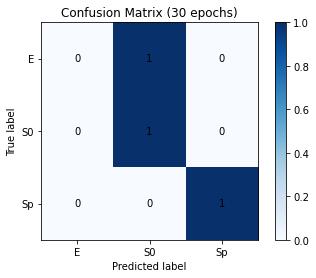

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Confusion Matrix (30 epochs)')
res = ax.imshow(confusion_matrix, cmap='Blues')
fig.colorbar(res)

width, height = confusion_matrix.shape
for x in range(width):
    for y in range(height):
        ax.annotate(np.format_float_positional(confusion_matrix[x][y], precision=2, trim='-'), xy=(y, x), horizontalalignment='center', verticalalignment='center') 

classes = np.array(['E','S0','Sp'])
plt.xticks(range(width), classes[:width])
plt.yticks(range(height), classes[:height])

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')